## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data0 = pd.read_csv('../Datasets/urldata_v2.csv')
data0.head()

,URL,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,http://graphicriver.net/search?date=this-month...,graphicriver.net,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,http://ecnavi.jp/redirect/?url=http://www.cros...,ecnavi.jp,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,https://hubpages.com/signin?explain=follow+Hub...,hubpages.com,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,0,1,1,1,1,0
4,http://icicibank.com/Personal-Banking/offers/o...,icicibank.com,0,0,1,3,0,0,0,0,0,0,0,0,1,1,1,1,0


## **Data Description**  
1 (phishing) or 0 (legitimate) for all features  
For more reference check [URL Feature Extraction.ipynb](https://colab.research.google.com/drive/1lWUq44iqC9kkumzuCcS6bLAhLnd6GChY?usp=sharing)<br><br>


Column Heading     | Description
-------------------|------------------
<br>**Address Bar Based Features**<br>
**Domain**         | Domain Name
**Have_IP**        | Checks for IP address in URL
**Have_At**        | Checks the presence of @ in URL
**URL_Length**     | Finding the length of URL and categorizing
**URL_Depth**      | Gives number of '/' in URL
**Redirection**    | Checking for redirection '//' in the url
**https_Domain**   | Existence of “HTTPS” Token in the Domain Part of the URL
**TinyURL**        | Checking for Shortening Services in URL
**Prefix/Suffix**  | Checking for Prefix or Suffix Separated by (-) in the Domain
<br>**Domain Based Features**<br>
**DNS_Record**     | DNS Record availability
**Web traffic**    | Categorize based on rank
**Domain_Age**     | Survival time of domain: The difference between termination time and creation time
**Domain_End**     | End time of domain: The difference between termination time and current time
<br>**HTML and JavaScript based Features**<br>
**iFrame**         | IFrame Redirection
**Mouse_Over**     | Checks the effect of mouse over on status bar
**Right_Click**    | Checks the status of the right click attribute
**Web_Forwards**   | Checks the number of forwardings
**Label**          | Phishing or Legitimate


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Checking the shape of the dataset
data0.shape

(20000, 19)

In [4]:
#Listing the features of the dataset
data0.columns

Index(['URL', 'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   URL            20000 non-null  object
 1   Domain         20000 non-null  object
 2   Have_IP        20000 non-null  int64 
 3   Have_At        20000 non-null  int64 
 4   URL_Length     20000 non-null  int64 
 5   URL_Depth      20000 non-null  int64 
 6   Redirection    20000 non-null  int64 
 7   https_Domain   20000 non-null  int64 
 8   TinyURL        20000 non-null  int64 
 9   Prefix/Suffix  20000 non-null  int64 
 10  DNS_Record     20000 non-null  int64 
 11  Web_Traffic    20000 non-null  int64 
 12  Domain_Age     20000 non-null  int64 
 13  Domain_End     20000 non-null  int64 
 14  iFrame         20000 non-null  int64 
 15  Mouse_Over     20000 non-null  int64 
 16  Right_Click    20000 non-null  int64 
 17  Web_Forwards   20000 non-null  int64 
 18  Label          20000 non-n

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

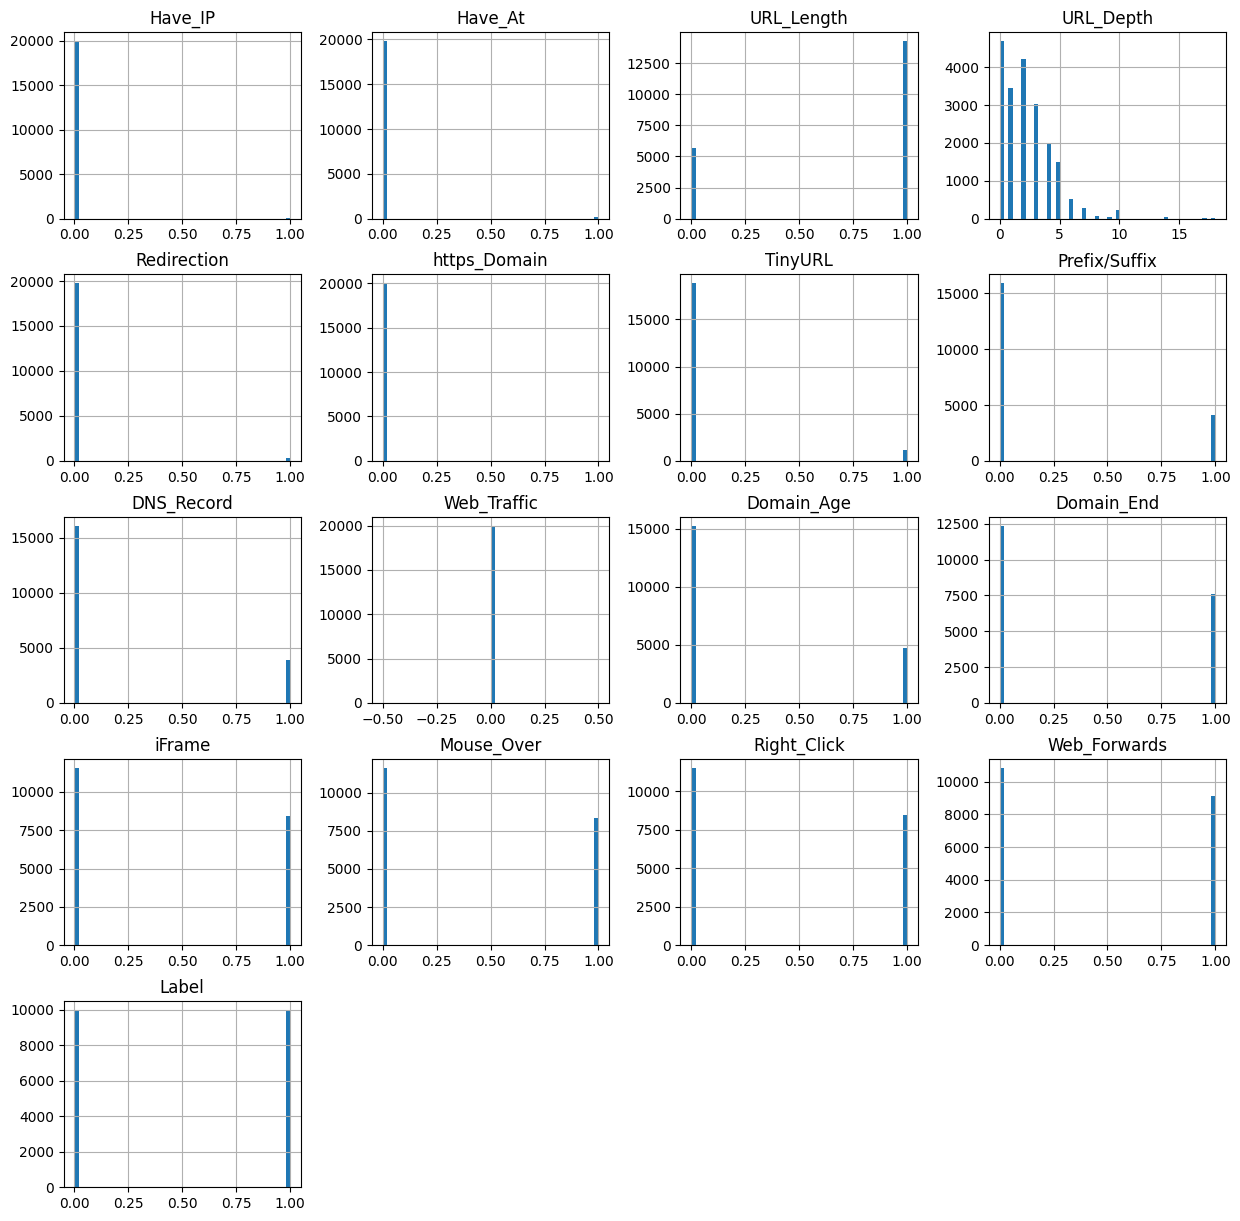

In [6]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

C:\Users\Priyasu\AppData\Local\Temp\ipykernel_37068\2629205811.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr())


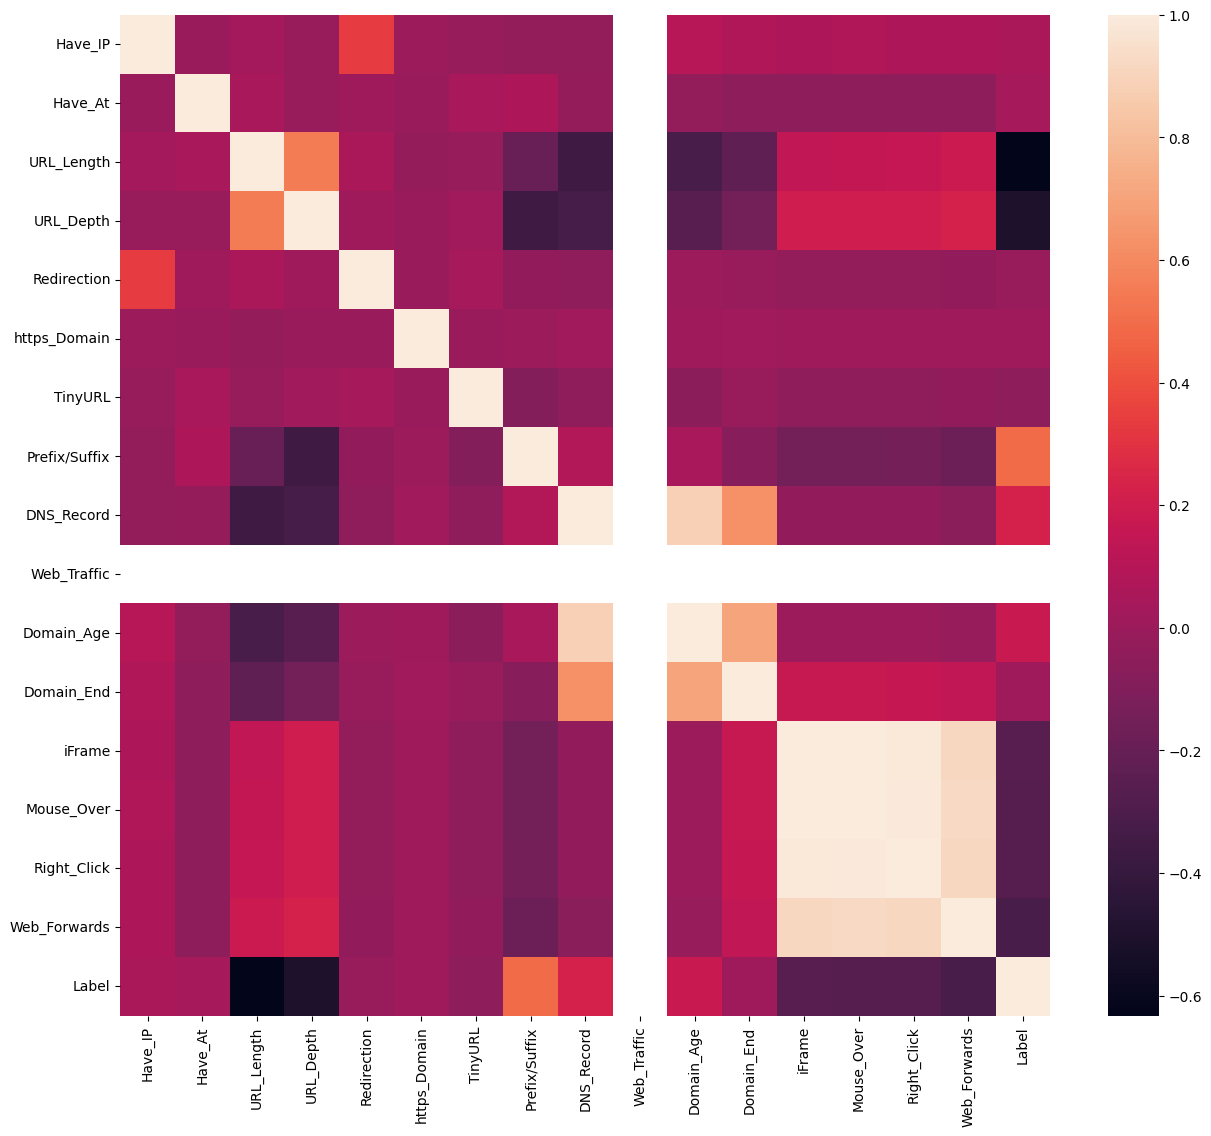

In [7]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [8]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.003600,0.009900,0.71415,2.249700,0.013050,0.000200,0.058700,0.205000,0.195550,0.0,0.236900,0.380750,0.420900,0.417900,0.423450,0.457300,0.500000
std,0.059893,0.099007,0.45183,2.060913,0.113492,0.014141,0.235068,0.403712,0.396633,0.0,0.425191,0.485583,0.493716,0.493226,0.494118,0.498186,0.500013
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,1.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset.

In [9]:
#Dropping the URL & Domain column
data = data0.drop(data0.columns[:2], axis=1)

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [10]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [12]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((20000, 16), (20000,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((16000, 16), (4000, 16))

In [83]:
# # Exporting train and test datasets
# X_train.to_csv("url_training.csv", index=False)
# from google.colab import files
# files.download('url_training.csv')

In [84]:
# X_test.to_csv("url_testing.csv", index=False)
# from google.colab import files
# files.download('url_testing.csv')

In [85]:
train_df = pd.concat([X_train, y_train], axis=1)

In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 13571 to 14155
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        16000 non-null  int64
 1   Have_At        16000 non-null  int64
 2   URL_Length     16000 non-null  int64
 3   URL_Depth      16000 non-null  int64
 4   Redirection    16000 non-null  int64
 5   https_Domain   16000 non-null  int64
 6   TinyURL        16000 non-null  int64
 7   Prefix/Suffix  16000 non-null  int64
 8   DNS_Record     16000 non-null  int64
 9   Web_Traffic    16000 non-null  int64
 10  Domain_Age     16000 non-null  int64
 11  Domain_End     16000 non-null  int64
 12  iFrame         16000 non-null  int64
 13  Mouse_Over     16000 non-null  int64
 14  Right_Click    16000 non-null  int64
 15  Web_Forwards   16000 non-null  int64
 16  Label          16000 non-null  int64
dtypes: int64(17)
memory usage: 2.2 MB


In [87]:
# train_df.to_csv("url_training.csv", index=False)
# files.download("url_training.csv")

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [14]:
#importing packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [15]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
pre_train = []
pre_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
auc_train = []
auc_test = []

#function to call for storing the results
def storeResults(model, a1,a2, p1, p2, r1, r2, f1, f2, auc1, auc2):
  ML_Model.append(model)
  acc_train.append(round(a1, 3))
  acc_test.append(round(a2, 3))
  pre_train.append(round(p1, 3))
  pre_test.append(round(p2, 3))
  recall_train.append(round(r1, 3))
  recall_test.append(round(r2, 3))
  f1_train.append(round(f1, 3))
  f1_test.append(round(f2, 3))
  auc_train.append(round(auc1, 3))
  auc_test.append(round(auc2, 3))

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [16]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [17]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

y_train_tree_prob = tree.predict_proba(X_train)[:,1]
y_test_tree_prob = tree.predict_proba(X_test)[:,1]

**Performance Evaluation:**

In [18]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

# Precision, Recall, F1-score
precision_train_tree = precision_score(y_train, y_train_tree)
precision_test_tree = precision_score(y_test, y_test_tree)

recall_train_tree = recall_score(y_train, y_train_tree)
recall_test_tree = recall_score(y_test, y_test_tree)

f1_train_tree = f1_score(y_train, y_train_tree)
f1_test_tree = f1_score(y_test, y_test_tree)

# ROC-AUC
auc_train_tree = roc_auc_score(y_train, y_train_tree_prob)
auc_test_tree = roc_auc_score(y_test, y_test_tree_prob)

print("Decision Tree: Precision on training Data: {:.3f}".format(precision_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(precision_test_tree))
print("Decision Tree: Recall on training Data: {:.3f}".format(recall_train_tree))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_test_tree))
print("Decision Tree: F1-score on training Data: {:.3f}".format(f1_train_tree))
print("Decision Tree: F1-score on test Data: {:.3f}".format(f1_test_tree))
print("Decision Tree: AUC on training Data: {:.3f}".format(auc_train_tree))
print("Decision Tree: AUC on test Data: {:.3f}".format(auc_test_tree))

Decision Tree: Accuracy on training Data: 0.924
Decision Tree: Accuracy on test Data: 0.930
Decision Tree: Precision on training Data: 0.961
Decision Tree: Precision on test Data: 0.968
Decision Tree: Recall on training Data: 0.883
Decision Tree: Recall on test Data: 0.893
Decision Tree: F1-score on training Data: 0.921
Decision Tree: F1-score on test Data: 0.929
Decision Tree: AUC on training Data: 0.955
Decision Tree: AUC on test Data: 0.959


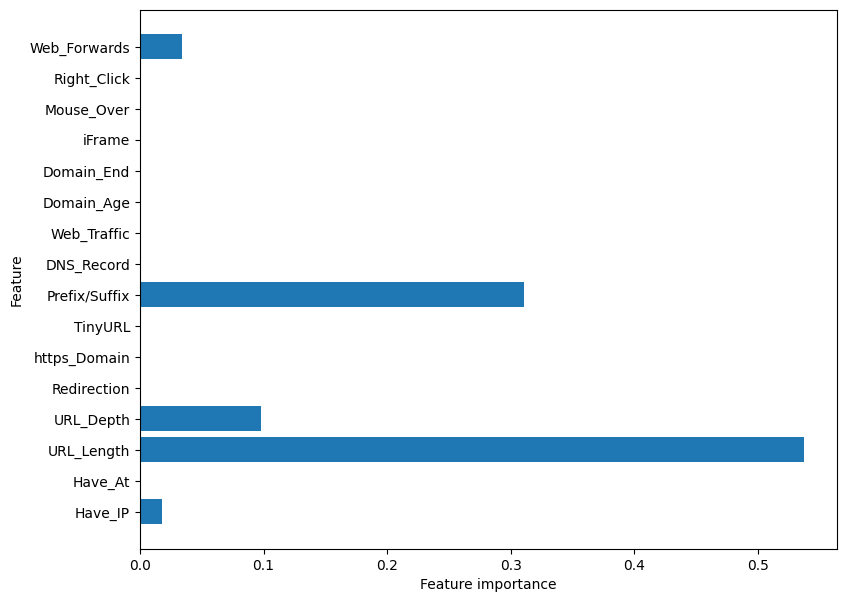

In [19]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree, precision_train_tree, precision_test_tree, recall_train_tree, recall_test_tree, f1_train_tree, f1_test_tree, auc_train_tree, auc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

y_train_forest_prob = forest.predict_proba(X_train)[:,1]
y_test_forest_prob = forest.predict_proba(X_test)[:,1]

**Performance Evaluation:**

In [23]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

# Precision, Recall, F1-score
precision_train_forest = precision_score(y_train, y_train_forest)
precision_test_forest = precision_score(y_test, y_test_forest)

recall_train_forest = recall_score(y_train, y_train_forest)
recall_test_forest = recall_score(y_test, y_test_forest)

f1_train_forest = f1_score(y_train, y_train_forest)
f1_test_forest = f1_score(y_test, y_test_forest)

# ROC-AUC
auc_train_forest = roc_auc_score(y_train, y_train_forest_prob)
auc_test_forest = roc_auc_score(y_test, y_test_forest_prob)

print("Random Forest: Precision on training Data: {:.3f}".format(precision_train_forest))
print("Random Forest: Precision on test Data: {:.3f}".format(precision_test_forest))
print("Random Forest: Recall on training Data: {:.3f}".format(recall_train_forest))
print("Random Forest: Recall on test Data: {:.3f}".format(recall_test_forest))
print("Random Forest: F1-score on training Data: {:.3f}".format(f1_train_forest))
print("Random Forest: F1-score on test Data: {:.3f}".format(f1_test_forest))
print("Random Forest: AUC on training Data: {:.3f}".format(auc_train_forest))
print("Random Forest: AUC on test Data: {:.3f}".format(auc_test_forest))

Random forest: Accuracy on training Data: 0.904
Random forest: Accuracy on test Data: 0.906
Random Forest: Precision on training Data: 0.993
Random Forest: Precision on test Data: 0.994
Random Forest: Recall on training Data: 0.812
Random Forest: Recall on test Data: 0.820
Random Forest: F1-score on training Data: 0.894
Random Forest: F1-score on test Data: 0.899
Random Forest: AUC on training Data: 0.963
Random Forest: AUC on test Data: 0.969


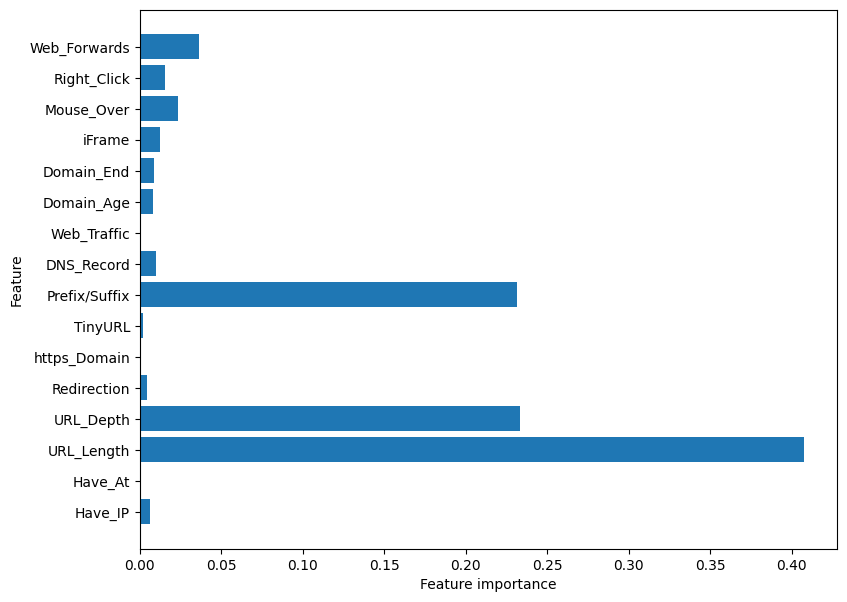

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest, precision_train_forest, precision_test_forest, recall_train_forest, recall_test_forest, f1_train_forest, f1_test_forest, auc_train_forest, auc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [26]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [27]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

y_train_mlp_prob = mlp.predict_proba(X_train)[:,1]
y_test_mlp_prob = mlp.predict_proba(X_test)[:,1]

**Performance Evaluation:**

In [28]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

# Precision, Recall, F1-score
precision_train_mlp = precision_score(y_train, y_train_mlp)
precision_test_mlp = precision_score(y_test, y_test_mlp)

recall_train_mlp = recall_score(y_train, y_train_mlp)
recall_test_mlp = recall_score(y_test, y_test_mlp)

f1_train_mlp = f1_score(y_train, y_train_mlp)
f1_test_mlp = f1_score(y_test, y_test_mlp)

# ROC-AUC
auc_train_mlp = roc_auc_score(y_train, y_train_mlp_prob)
auc_test_mlp = roc_auc_score(y_test, y_test_mlp_prob)

print("Multilayer Perceptrons: Precision on training Data: {:.3f}".format(precision_train_mlp))
print("Multilayer Perceptrons: Precision on test Data: {:.3f}".format(precision_test_mlp))
print("Multilayer Perceptrons: Recall on training Data: {:.3f}".format(recall_train_mlp))
print("Multilayer Perceptrons: Recall on test Data: {:.3f}".format(recall_test_mlp))
print("Multilayer Perceptrons: F1-score on training Data: {:.3f}".format(f1_train_mlp))
print("Multilayer Perceptrons: F1-score on test Data: {:.3f}".format(f1_test_mlp))
print("Multilayer Perceptrons: AUC on training Data: {:.3f}".format(auc_train_mlp))
print("Multilayer Perceptrons: AUC on test Data: {:.3f}".format(auc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.939
Multilayer Perceptrons: Accuracy on test Data: 0.944
Multilayer Perceptrons: Precision on training Data: 0.987
Multilayer Perceptrons: Precision on test Data: 0.988
Multilayer Perceptrons: Recall on training Data: 0.890
Multilayer Perceptrons: Recall on test Data: 0.900
Multilayer Perceptrons: F1-score on training Data: 0.936
Multilayer Perceptrons: F1-score on test Data: 0.942
Multilayer Perceptrons: AUC on training Data: 0.976
Multilayer Perceptrons: AUC on test Data: 0.978


**Storing the results:**

In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp, precision_train_mlp, precision_test_mlp, recall_train_mlp, recall_test_mlp, f1_train_mlp, f1_test_mlp, auc_train_mlp, auc_test_mlp)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [30]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

y_train_xgb_prob = xgb.predict_proba(X_train)[:,1]
y_test_xgb_prob = xgb.predict_proba(X_test)[:,1]

**Performance Evaluation:**

In [32]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

# Precision, Recall, F1-score
precision_train_xgb = precision_score(y_train, y_train_xgb)
precision_test_xgb = precision_score(y_test, y_test_xgb)

recall_train_xgb = recall_score(y_train, y_train_xgb)
recall_test_xgb = recall_score(y_test, y_test_xgb)

f1_train_xgb = f1_score(y_train, y_train_xgb)
f1_test_xgb = f1_score(y_test, y_test_xgb)

# ROC-AUC
auc_train_xgb = roc_auc_score(y_train, y_train_xgb_prob)
auc_test_xgb = roc_auc_score(y_test, y_test_xgb_prob)

print("XGBoost: Precision on training Data: {:.3f}".format(precision_train_xgb))
print("XGBoost: Precision on test Data: {:.3f}".format(precision_test_xgb))
print("XGBoost: Recall on training Data: {:.3f}".format(recall_train_xgb))
print("XGBoost: Recall on test Data: {:.3f}".format(recall_test_xgb))
print("XGBoost: F1-score on training Data: {:.3f}".format(f1_train_xgb))
print("XGBoost: F1-score on test Data: {:.3f}".format(f1_test_xgb))
print("XGBoost: AUC on training Data: {:.3f}".format(auc_train_xgb))
print("XGBoost: AUC on test Data: {:.3f}".format(auc_test_xgb))

XGBoost: Accuracy on training Data: 0.939
XGBoost : Accuracy on test Data: 0.943
XGBoost: Precision on training Data: 0.983
XGBoost: Precision on test Data: 0.985
XGBoost: Recall on training Data: 0.893
XGBoost: Recall on test Data: 0.902
XGBoost: F1-score on training Data: 0.936
XGBoost: F1-score on test Data: 0.941
XGBoost: AUC on training Data: 0.977
XGBoost: AUC on test Data: 0.978


**Storing the results:**

In [33]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb, precision_train_xgb, precision_test_xgb, recall_train_xgb, recall_test_xgb, f1_train_xgb, f1_test_xgb, auc_train_xgb, auc_test_xgb)

### **7.5. Autoencoder Neural Network**
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

Exclude

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 14)                238       
                                                                 
 dense_5 (Dense)             (None, 16)                240       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
Total params: 1294 (5.05 KB)
Trainable params: 1294 (5.05 KB)

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 3s 6ms/step - loss: 0.3335 - accuracy: 0.4717 - val_loss: -0.3354 - val_accuracy: 0.6491
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: -0.4863 - accuracy: 0.5238 - val_loss: -0.4935 - val_accuracy: 0.4509
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: -0.5793 - accuracy: 0.4144 - val_loss: -0.5705 - val_accuracy: 0.3734
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: -0.6178 - accuracy: 0.4005 - val_loss: -0.5816 - val_accuracy: 0.3931
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: -0.6168 - accuracy: 0.2944 - val_loss: -0.5847 - val_accuracy: 0.2412
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: -0.6366 - accuracy: 0.2466 - val_loss: -0.6058 - val_accuracy: 0.2391
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: -0.6568 - accuracy: 0.2332 - val_loss: -0.6262 - val_accuracy: 

**Performance Evaluation:**

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

125/125 [==============================] - 0s 2ms/step - loss: -0.6874 - accuracy: 0.1433

Autoencoder: Accuracy on training Data: 0.142
Autoencoder: Accuracy on test Data: 0.143


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### **7.6. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [34]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [35]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

y_test_svm_prob = svm.decision_function(X_test)
y_train_svm_prob = svm.decision_function(X_train)

**Performance Evaluation:**

In [36]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision, Recall, F1-score
precision_train_svm = precision_score(y_train, y_train_svm)
precision_test_svm = precision_score(y_test, y_test_svm)

recall_train_svm = recall_score(y_train, y_train_svm)
recall_test_svm = recall_score(y_test, y_test_svm)

f1_train_svm = f1_score(y_train, y_train_svm)
f1_test_svm = f1_score(y_test, y_test_svm)

# ROC-AUC
auc_train_svm = roc_auc_score(y_train, y_train_svm_prob)
auc_test_svm = roc_auc_score(y_test, y_test_svm_prob)

print("SVM: Precision on training Data: {:.3f}".format(precision_train_svm))
print("SVM: Precision on test Data: {:.3f}".format(precision_test_svm))
print("SVM: Recall on training Data: {:.3f}".format(recall_train_svm))
print("SVM: Recall on test Data: {:.3f}".format(recall_test_svm))
print("SVM: F1-score on training Data: {:.3f}".format(f1_train_svm))
print("SVM: F1-score on test Data: {:.3f}".format(f1_test_svm))
print("SVM: AUC on training Data: {:.3f}".format(auc_train_svm))
print("SVM: AUC on test Data: {:.3f}".format(auc_test_svm))

SVM: Accuracy on training Data: 0.894
SVM : Accuracy on test Data: 0.898
SVM: Precision on training Data: 0.993
SVM: Precision on test Data: 0.993
SVM: Recall on training Data: 0.793
SVM: Recall on test Data: 0.805
SVM: F1-score on training Data: 0.882
SVM: F1-score on test Data: 0.889
SVM: AUC on training Data: 0.926
SVM: AUC on test Data: 0.934


**Storing the results:**

In [37]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm, precision_train_svm, precision_test_svm, recall_train_svm, recall_test_svm, f1_train_svm, f1_test_svm, auc_train_svm, auc_test_svm)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [38]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train Precision': pre_train,
    'Test Precision': pre_test,
    'Train Recall': recall_train,
    'Test Recall': recall_test,
    'Train F1': f1_train,
    'Test F1': f1_test,
    'Train AUC': auc_train,
    'Test AUC': auc_test})
results

,ML Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train AUC,Test AUC
0,Decision Tree,0.924,0.930,0.961,0.968,0.883,0.893,0.921,0.929,0.955,0.959
1,Random Forest,0.904,0.906,0.993,0.994,0.812,0.820,0.894,0.899,0.963,0.969
2,Multilayer Perceptrons,0.939,0.944,0.987,0.988,0.890,0.900,0.936,0.942,0.976,0.978
3,XGBoost,0.939,0.943,0.983,0.985,0.893,0.902,0.936,0.941,0.977,0.978
4,SVM,0.894,0.898,0.993,0.993,0.793,0.805,0.882,0.889,0.926,0.934


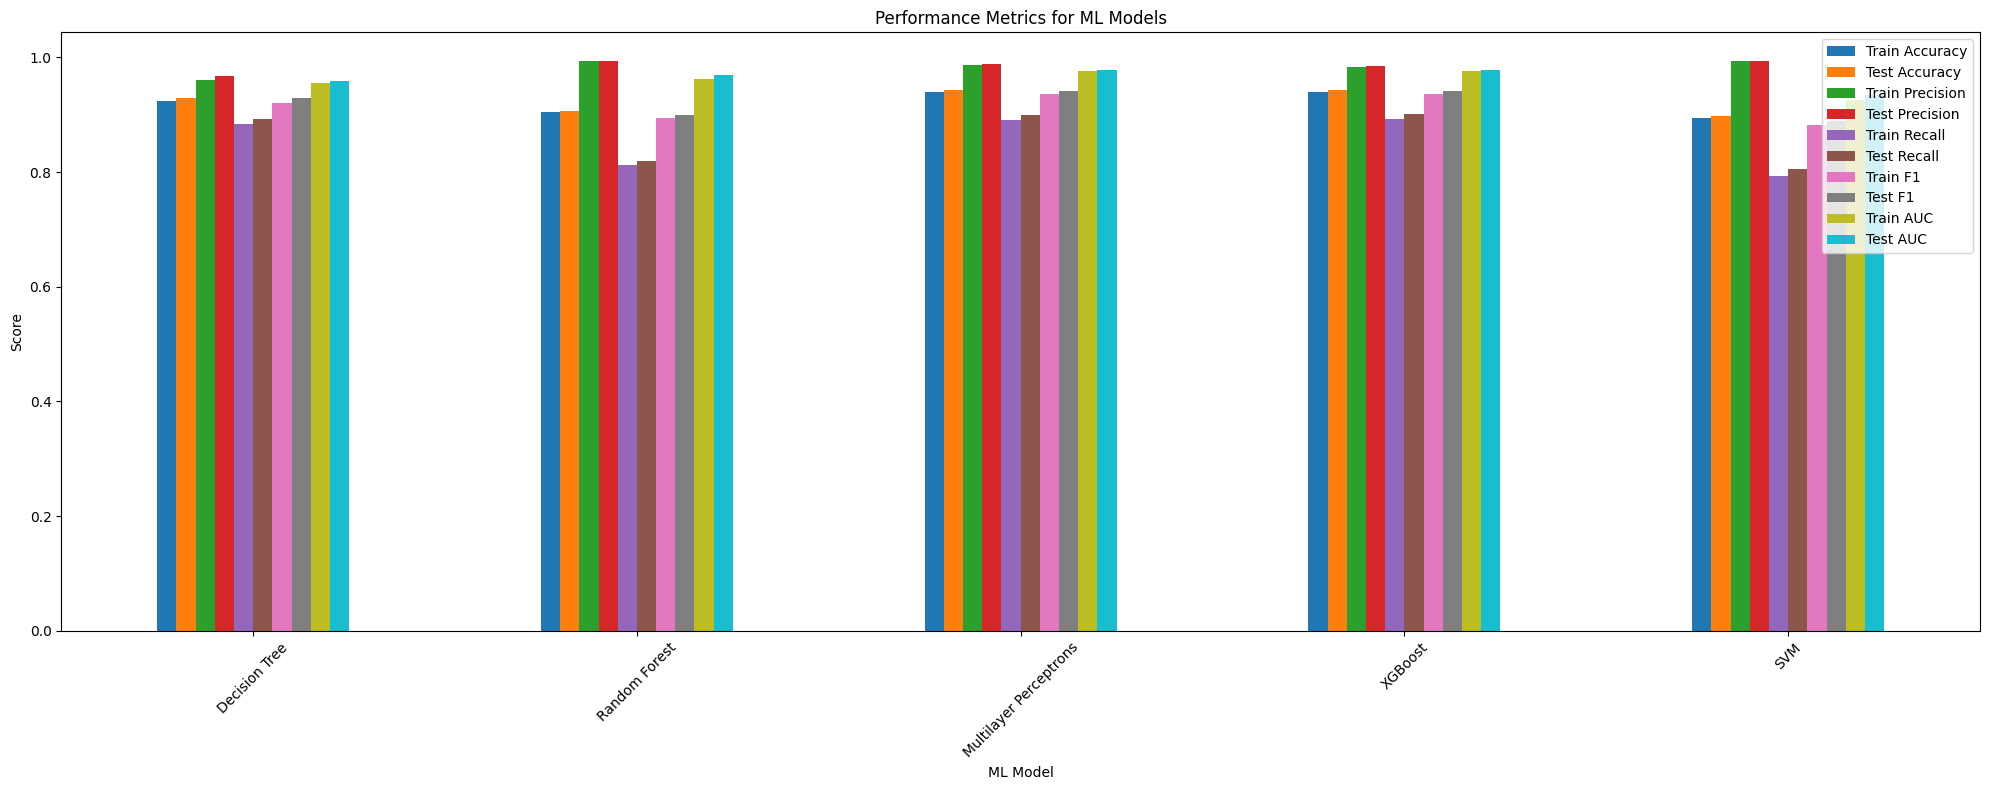

In [39]:
# Plotting the metrics using a bar graph
results.plot(x='ML Model', y=['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision',
                               'Train Recall', 'Test Recall', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC'],
             kind='bar', figsize=(20, 8), title='Performance Metrics for ML Models')
plt.xlabel('ML Model')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train AUC,Test AUC
2,Multilayer Perceptrons,0.939,0.944,0.987,0.988,0.890,0.900,0.936,0.942,0.976,0.978
3,XGBoost,0.939,0.943,0.983,0.985,0.893,0.902,0.936,0.941,0.977,0.978
0,Decision Tree,0.924,0.930,0.961,0.968,0.883,0.893,0.921,0.929,0.955,0.959
1,Random Forest,0.904,0.906,0.993,0.994,0.812,0.820,0.894,0.899,0.963,0.969
4,SVM,0.894,0.898,0.993,0.993,0.793,0.805,0.882,0.889,0.926,0.934


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [41]:
import joblib

# Save the XGBoost model
joblib.dump(xgb, 'url_xgboost_model.pkl')

# Download the XGBoost model
from IPython.display import FileLink
display(FileLink('url_xgboost_model.pkl'))

d:\Final Year project\Multimodal-FND-on-Twitter\Notebooks\url_xgboost_model.pkl

**Testing the saved model:**

In [ ]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

# Testing the model

In [42]:
test_data = [[0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]]
test_data = np.array(test_data)

# make a prediction
y_pred = xgb.predict(test_data)

y_pred

SyntaxError: invalid syntax. Perhaps you forgot a comma? (405360436.py, line 1)